# Preparation

In [1]:
%load_ext ipycache
import iminuit
import joblib
%load_ext line_profiler
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing
import numba
import numpy as np
import pandas as pd
import pymp
%load_ext rpy2.ipython
import scipy as sp
from scipy import optimize
import seaborn as sns
import warnings

sns.set_style('darkgrid')
sns.set_context('notebook')

%load_ext watermark
%watermark
%watermark -p pandas,scipy

/home/fabrost/miniconda3/envs/spols190117/lib/python3.6/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/fabrost/miniconda3/envs/spols190117/lib/python3.6/site-packages/ipycache.py:17: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils.traitlets import Unicode


2019-04-02T08:20:55+02:00

CPython 3.6.8
IPython 7.2.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.4.172-86-default
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
pandas 0.24.2
scipy 1.2.0


In [2]:
cachedir = '/scratch/cache/'

In [3]:
results = pd.DataFrame()

# atmospheric C14

In [4]:
xp = np.array([ 1891.5, 1892.5, 1893.5, 1894.5, 1895.5, 1896.5, 1897.5, 1898.5, 1899.5, 1900.5, 1901.5, 1902.5, 1903.5, 1904.5, 1905.5, 1906.5, 1907.5, 1908.5, 1909.5, 1910.5, 1911.5, 1912.5, 1913.5, 1914.5, 1915.5, 1916.5, 1917.5, 1918.5, 1919.5, 1920.5, 1921.5, 1922.5, 1923.5, 1924.5, 1925.5, 1926.5, 1927.5, 1928.5, 1929.5, 1930.5, 1931.5, 1932.5, 1933.5, 1934.5, 1935.5, 1936.5, 1937.5, 1938.5, 1939.5, 1940.5, 1941.5, 1942.5, 1943.5, 1944.5, 1945.5, 1946.5, 1947.5, 1948.5, 1949.5, 1950.5, 1951.5, 1952.5, 1953.5, 1954.5, 1955.5, 1956.5, 1957.5, 1958.5, 1959.5, 1960.5, 1961.5, 1962.5, 1963.5, 1964.5, 1965.5, 1966.5, 1967.5, 1968.5, 1969.5, 1970.5, 1971.5, 1972.5, 1973.5, 1974.5, 1975.5, 1976.5, 1977.5, 1978.5, 1979.5, 1980.5, 1981.5, 1982.5, 1983.5, 1984.5, 1985.5, 1986.5, 1987.5, 1988.5, 1989.5, 1990.5, 1991.5, 1992.5, 1993.5, 1994.5, 1995.5, 1996.5, 1997.5, 1998.5, 1999.5, 2000.5, 2001.5, 2002.5, 2003.5, 2003.963938,  2004.421821,  2004.879704, 2005.337587,  2005.79547 ,  2006.253353,  2006.711236, 2007.169119,  2007.627002,  2008.084885,  2008.542768, 2009.000651,  2009.458534,  2009.916417,  2010.3743  , 2010.3743  ,  2010.626   ,  2011.125   ,  2011.626   , 2012.125   ,  2012.626   ,  2013.125   ,  2013.626   , 2014.125   ,  2014.626   ,  2015.125   ,  2015.625   , 2016.125   ,  2016.625   ,  2020.      ])
fp = np.array([-0.002     , -0.002     , -0.002     , -0.002     , -0.002     , -0.00233   , -0.00267   , -0.003     , -0.00333   , -0.00367   , -0.004     , -0.00433   , -0.00467   , -0.005     , -0.00533   , -0.00567   , -0.006     , -0.00633   , -0.00667   , -0.007     , -0.00733   , -0.00767   , -0.008     , -0.00833   , -0.00867   , -0.009     , -0.00933   , -0.00967   , -0.01      , -0.01033   , -0.01067   , -0.011     , -0.01133   , -0.01167   , -0.012     , -0.01233   , -0.01267   , -0.013     , -0.01333   , -0.01367   , -0.014     , -0.01433   , -0.01467   , -0.015     , -0.01533   , -0.01567   , -0.016     , -0.01633   , -0.01667   , -0.0202    , -0.0194    , -0.0196    , -0.0225    , -0.0217    , -0.0221    , -0.0216    , -0.0211    , -0.0223    , -0.0246    , -0.0248    , -0.0248    , -0.0249    , -0.0239    , -0.0211    , -0.0082    , 0.0265    ,  0.073     ,  0.1402    ,  0.228     ,  0.2123    , 0.2216    ,  0.3585    ,  0.7183    ,  0.8357    ,  0.7563    , 0.6919    ,  0.6236    ,  0.5645    ,  0.5454    ,  0.5291    , 0.4994    ,  0.4656    ,  0.4186    ,  0.4008    ,  0.3698    , 0.3525    ,  0.3339    ,  0.3258    ,  0.2958    ,  0.2645    , 0.2567    ,  0.2383    ,  0.2242    ,  0.2093    ,  0.2013    , 0.1911    ,  0.1826    ,  0.1734    ,  0.1635    ,  0.1525    , 0.1429    ,  0.1364    ,  0.1284    ,  0.1221    ,  0.1155    , 0.1099    ,  0.1043    ,  0.0981    ,  0.09      ,  0.0866    , 0.0807    ,  0.0749    ,  0.0689    ,  0.06349874,  0.06145905, 0.0597412 ,  0.05822747,  0.05641489,  0.05479531,  0.05364811, 0.05205465,  0.05067073,  0.04927897,  0.04788014,  0.04647508, 0.04506462,  0.04364948,  0.04223027,  0.04223027,  0.0403    , 0.0347    ,  0.0371    ,  0.0312    ,  0.0299    ,  0.0193    , 0.0219    ,  0.0182    ,  0.018     ,  0.0116    ,  0.0129    , 0.0096    ,  0.0097    ,  0.0097    ])
C_atm = lambda x: sp.interp(x, xp+1, fp)

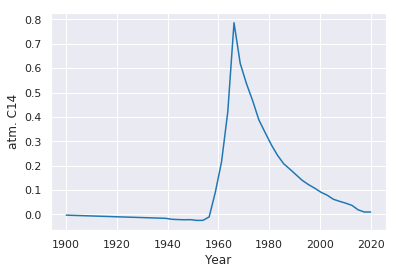

In [5]:
tt = np.linspace(1900, 2020)
plt.plot(tt, C_atm(tt))
plt.xlabel('Year')
plt.ylabel('atm. C14')
plt.show()

# Ploidy

In [6]:
ploidy_data = pd.read_excel('../../data/kudryavtsev_et_al_1993_table_2.xlsx')

In [7]:
ploidy_data['age'] = ploidy_data[['age_min', 'age_max']].mean(axis='columns')
ploidy_data['2C_mean'] /= 100.0
ploidy_data['2C_sem'] /= 100.0

In [8]:
ploidy = sp.interpolate.UnivariateSpline(ploidy_data['age'].values,
                                ploidy_data['2C_mean'].values,
                               ext=3)

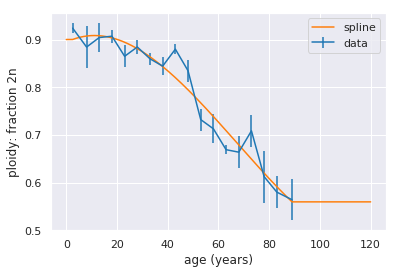

In [9]:
tt = np.linspace(0, 120, 1000)
plt.errorbar(ploidy_data['age'].values, ploidy_data['2C_mean'].values, ploidy_data['2C_sem'].values, label='data')
plt.plot(tt, ploidy(tt), label='spline')
plt.xlabel('age (years)')
plt.ylabel('ploidy: fraction 2n')
plt.legend()
plt.show()

# Read patient data

In [10]:
data = pd.read_pickle('../../results/C14data_liver_samples_2019-04-01.pkl')

Filter samples with error_measurement too big:

In [11]:
data = data[data['error_measurement'] < 0.5*0.03]

In [12]:
data[['sample', 'pathology']].head()

,sample,pathology
0,ND380,N
1,ND388,N
2,ND381,N
3,ND382,N
4,ND022,N


Calculate mean values for repeated measurements:

In [13]:
c14_patient_data = data.groupby(['type', 'sample']).mean().dropna(how='all').reset_index()
c14_patient_data = c14_patient_data.merge(data[['sample', 'pathology']].drop_duplicates())

In [14]:
c14_patient_data.head()

,type,sample,Dbirth,Dcoll,d14C,error_measurement,N_cells,subject_age,pathology
0,2n hepatocyte,HL#11,1975.333333,2019.75,0.0162,0.00640,77.0,44.416667,T
1,4n hepatocyte,HL#11,1975.333333,2019.75,0.0396,0.00685,12.0,44.416667,T
2,non-hepatocyte,HL#11,1975.333333,2019.75,-0.0335,0.00880,36.0,44.416667,T
3,2n hepatocyte,ND255,1961.583333,2012.50,0.0805,0.00785,64.0,50.916667,N
4,4n hepatocyte,ND255,1961.583333,2012.50,0.1130,0.00645,30.0,50.916667,N


# SSE & log-likelihood

In [15]:
def SSE(p, model, data):
    model_data = model(data['Dbirth'].values, 
                    data['Dcoll'].values, 
                    *p)
    sse = np.sum((model_data - data['d14C'].values)**2)
    return sse    

In [16]:
def Sigma(p, model, data):
    sse = SSE(p, model, data)
    n = len(data)
    sigma = np.sqrt(sse/n)
    return sigma

In [17]:
def Nloglike(p, model, data):
    sse = SSE(p, model, data)
    n = len(data)
    sig = np.sqrt(sse/n)
    loglike = -n/2 * np.log(2*np.pi) - n/2 * np.log(sig**2) - 1 / (2*sig**2) * sse
    return -loglike

In [18]:
def migrad(x0, model, data, error=0.1, limit=None):
    M = iminuit.Minuit.from_array_func(lambda x0: Nloglike(x0, model, data),
                                       x0,
                                       error=error,
                                       limit=limit,
                                       errordef=0.5,
                                       name=iminuit.describe(model.pyfunc)[2:],
                                      print_level=0)
    try:
        M.migrad()
        try:
            corr = M.matrix(correlation=True)
        except:
            corr = np.nan
        return M.values.values(), M.errors.values(),  M.fval, M.migrad_ok(), corr
    except:
        return np.nan*np.ones_like(x0), M.errors.values(), np.inf, M.migrad_ok(), np.nan

In [19]:
memory = joblib.Memory(location=cachedir)

@memory.cache(ignore=['processes'])
def multistart_migrad(modelname, ranges_, dataset, error=0.1, limit=None, n=100, processes=8, seed=42, step_=2):
    global step
    step = step_
    
    data = datasets[dataset]
    
    np.random.seed(seed)
    model = eval(modelname)
    x0s = np.random.uniform(ranges_[0], ranges_[1], (n, len(ranges_[0])))
    fvals = pymp.shared.array((n, ))
    valid = pymp.shared.array((n, ), dtype='bool')
    values = pymp.shared.array((n, len(ranges_[0])))
    perrors = pymp.shared.array((n, len(ranges_[0])))
    pcorr = pymp.shared.array((n, len(ranges_[0]), len(ranges_[0])))

    with pymp.Parallel(processes) as p:
        for index in p.range(n):
            res = migrad(x0s[index], model, data, error, limit)
            values[index] = tuple(res[0])
            perrors[index] = tuple(res[1])
            fvals[index] = res[2]
            valid[index] = res[3]
            pcorr[index] = res[4]

    res = pd.DataFrame.from_records((x0s, fvals, values, perrors, pcorr, valid), 
                                    index=['x0', 'fval', 'values', 'errors', 'corr', 'valid']).T
    res['fval'] = res['fval'].astype('float')
    res['valid'] = res['valid'].astype('bool')
    res.columns.name = model.pyfunc.__name__
    res['n'] = len(data)
    return res

In [20]:
def summarise(res):
    """ Summarise the fit results """
    print(res.columns.name)
    plt.scatter(res['fval'].rank(), res['fval'])
    plt.show()
    best_res = res.loc[res['fval'].idxmin()]
    p_names = iminuit.util.describe(eval(res.columns.name).pyfunc)[2:]
    print('Parameter values')
    for name, value, error in zip(p_names, best_res['values'], best_res['errors']):
        if name.startswith('log'):
            print(f'{name[3:]}: {np.exp(value):.3g} [{np.exp(value-error):.3g}, {np.exp(value+error):.3g}]')
        else:
            print(f'{name}: {value:3g} +- {error:3g}')
    print()
    
    result = pd.Series([-best_res['fval'], len(p_names)+1, best_res['n']], index=['loglike', 'k', 'n'])
    result['cAIC'] = 2 * result['k'] - \
                     2 * result['loglike'] + \
                    (2*result['k']**2 + 2*result['k'])/(result['n']-result['k']-1)
    global results
    try:
        results.loc[res.columns.name] = result
    except:
        results=pd.DataFrame(columns=['loglike', 'k', 'n', 'cAIC'])
        results.loc[res.columns.name] = result
    return results

# Defining the models

## Scenario I1

In [21]:
@np.vectorize
def I1(Dbirth, Dcoll, loglam):
    lam = np.exp(loglam)

    def rhs(t, c):
            return lam * (C_atm(t) - c)

    C_init = C_atm(Dbirth)
    
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    return sol.y[-1]

## I1T_step

In [22]:
def loglam_step(t, loglam1, loglam2, t_step):
        return np.where(t < t_step, loglam1, loglam2)

@np.vectorize
def I1_loglamfun(Dbirth, Dcoll, loglamfun):
    def rhs(t, c):
            return np.exp(loglamfun(t-Dbirth)) * (C_atm(t) - c)

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    return sol.y[-1]

In [23]:
@np.vectorize
def I1T_step(Dbirth, Dcoll, loglam1, loglam2, t_step):   
    return I1_loglamfun(Dbirth, Dcoll, lambda t: loglam_step(t, loglam1, loglam2, t_step))

## I1T_lin

In [24]:
def lam_lin(t, loglam0, mu):
        return np.exp(loglam0) * (1 + mu * t)

@np.vectorize
def I1_lamfun(Dbirth, Dcoll, lamfun):
    def rhs(t, c):
        return lamfun(t-Dbirth) * (C_atm(t) - c)
#             return lamfun(t-Dbirth) * (C_atm(t) - c)

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    return sol.y[-1]

In [25]:
@np.vectorize
def I1T_lin(Dbirth, Dcoll, loglam0, mu):   
    return I1_lamfun(Dbirth, Dcoll, lambda t: lam_lin(t, loglam0, mu))

## Full Ploidy models

### Adjust death rates

In [26]:
@np.vectorize
def IPd(Dbirth, Dcoll, loglam2, loglam4, logk24, logk42):
    lam2 = np.exp(loglam2)
    lam4 = np.exp(loglam4)
    k24 = np.exp(logk24)
    k42 = np.exp(logk42)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2= (lam2*C_atm(t) + 2*c4*k42*(-1 + 1/ploidy(-Dbirth + t)) + 
               c2*(2*k42 - lam2 - (2*k42)/ploidy(-Dbirth + t))
              )
        dtc4= ((c2*k24*ploidy(-Dbirth + t))/(2 - 2*ploidy(-Dbirth + t)) + 
               (c4*(lam4 + (k24 - lam4)*ploidy(-Dbirth + t)))/(-1 + ploidy(-Dbirth + t)) + 
               C_atm(t)*(lam4 + (k24*ploidy(-Dbirth + t))/(2 - 2*ploidy(-Dbirth + t)))
              )
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

### Adjust exchange rates

In [27]:
@np.vectorize
def IPk(Dbirth, Dcoll, loglam2, loglam4, logd2, logd4):
    lam2 = np.exp(loglam2)
    lam4 = np.exp(loglam4)
    d2 = np.exp(logd2)
    d4 = np.exp(logd4)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2=lam2*C_atm(t) + c2*(-2*d2 + 2*d4 + lam2 - 2*lam4 - (2*(d4 - lam4))/ploidy(-Dbirth + t)) + (2*c4*(d4 - lam4 + (d2 - d4 - lam2 + lam4)*ploidy(-Dbirth + t)))/ploidy(-Dbirth + t)
        dtc4=(C_atm(t)*(-2*d4 + sp.misc.derivative(ploidy, t-Dbirth, 0.001) + (-d2 + 2*d4 + lam2)*ploidy(-Dbirth + t)))/(2.*(-1 + ploidy(-Dbirth + t))) + (c2*(-2*d4 + 2*lam4 + sp.misc.derivative(ploidy, t-Dbirth, 0.001) + (-d2 + 2*d4 + lam2 - 2*lam4)*ploidy(-Dbirth + t)))/(2.*(-1 + ploidy(-Dbirth + t))) - (c4*(-2*d4 + lam4 + sp.misc.derivative(ploidy, t-Dbirth, 0.001) - (d2 - 2*d4 - lam2 + lam4)*ploidy(-Dbirth + t)))/(-1 + ploidy(-Dbirth + t))
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

### Adjust division rates

In [28]:
@np.vectorize
def IPl(Dbirth, Dcoll, logd2, logd4, logk24, logk42):
    d2 = np.exp(logd2)
    d4 = np.exp(logd4)
    k24 = np.exp(logk24)
    k42 = np.exp(logk42)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2=2*c4*k42*(-1 + 1/ploidy(-Dbirth + t)) + c2*(-d2 - k24 - sp.misc.derivative(ploidy, t-Dbirth, 0.001)/ploidy(-Dbirth + t)) + (C_atm(t)*(-2*k42 + sp.misc.derivative(ploidy, t-Dbirth, 0.001) + (d2 + k24 + 2*k42)*ploidy(-Dbirth + t)))/ploidy(-Dbirth + t)
        dtc4=c4*(-d4 - k42 + sp.misc.derivative(ploidy, t-Dbirth, 0.001)/(1 - ploidy(-Dbirth + t))) + (c2*k24*ploidy(-Dbirth + t))/(2 - 2*ploidy(-Dbirth + t)) + (C_atm(t)*(-2*(d4 + k42 - sp.misc.derivative(ploidy, t-Dbirth, 0.001)) + (2*d4 + k24 + 2*k42)*ploidy(-Dbirth + t)))/(2.*(-1 + ploidy(-Dbirth + t)))
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## Ploidy models with assumptions

### `IP_l40`: Ploidy model, lam4=0, d2=d4, k42=0

In [29]:
@np.vectorize
def IP_l40(Dbirth, Dcoll, loglam2):
    lam2 = np.exp(loglam2)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2=-(c2*lam2) + lam2*C_atm(t)
        dtc4=c4*(sp.misc.derivative(ploidy, t-Dbirth, 0.001)/(1 - ploidy(-Dbirth + t)) - lam2*ploidy(-Dbirth + t)) + (c2*(sp.misc.derivative(ploidy, t-Dbirth, 0.001) - lam2*ploidy(-Dbirth + t) + lam2*ploidy(-Dbirth + t)**2))/(2.*(-1 + ploidy(-Dbirth + t))) + (C_atm(t)*(sp.misc.derivative(ploidy, t-Dbirth, 0.001) - lam2*ploidy(-Dbirth + t) + lam2*ploidy(-Dbirth + t)**2))/(2.*(-1 + ploidy(-Dbirth + t)))
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

### `IP_l2l4`: Ploidy model - same death, division rate, k42=0

In [30]:
@np.vectorize
def IP_l2l4(Dbirth, Dcoll, loglam2):
    lam2 = np.exp(loglam2)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2=-(c2*lam2) + lam2*C_atm(t)
        dtc4=c4*(-lam2 + sp.misc.derivative(ploidy, t-Dbirth, 0.001)/(1 - ploidy(-Dbirth + t))) + C_atm(t)*(lam2 + sp.misc.derivative(ploidy, t-Dbirth, 0.001)/(2.*(-1 + ploidy(-Dbirth + t)))) + (c2*sp.misc.derivative(ploidy, t-Dbirth, 0.001))/(2.*(-1 + ploidy(-Dbirth + t)))
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

### `IP_l40_step`: Ploidy model step - same death, lam4=0, k42=0

In [31]:
@np.vectorize
def IP_l40_loglamfun(Dbirth, Dcoll, loglamfun):
    def lam2(t):
        return np.exp(loglamfun(t))
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2=-(c2*lam2(t-Dbirth)) + lam2(t-Dbirth)*C_atm(t)
        dtc4=c4*(sp.misc.derivative(ploidy, t-Dbirth, 0.001)/(1 - ploidy(-Dbirth + t)) - lam2(t-Dbirth)*ploidy(-Dbirth + t)) + (c2*(sp.misc.derivative(ploidy, t-Dbirth, 0.001) - lam2(t-Dbirth)*ploidy(-Dbirth + t) + lam2(t-Dbirth)*ploidy(-Dbirth + t)**2))/(2.*(-1 + ploidy(-Dbirth + t))) + (C_atm(t)*(sp.misc.derivative(ploidy, t-Dbirth, 0.001) - lam2(t-Dbirth)*ploidy(-Dbirth + t) + lam2(t-Dbirth)*ploidy(-Dbirth + t)**2))/(2.*(-1 + ploidy(-Dbirth + t)))
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

In [32]:
@np.vectorize
def IP_l40_step(Dbirth, Dcoll, loglam1, loglam2, t_step):   
    return IP_l40_loglamfun(Dbirth, Dcoll, lambda t: loglam_step(t, loglam1, loglam2, t_step))

### `IP_l2l4_step`: Ploidy model step - same death, division rate, k42=0

In [33]:
@np.vectorize
def IP_l2l4_loglamfun(Dbirth, Dcoll, loglamfun):
    def lam2(t):
        return np.exp(loglamfun(t))
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2=-(c2*lam2(t-Dbirth)) + lam2(t-Dbirth)*C_atm(t)
        dtc4=(c4*(-lam2(t-Dbirth) + sp.misc.derivative(ploidy, t-Dbirth, 0.001)/(1 - ploidy(-Dbirth + t))) + 
              C_atm(t)*(lam2(t-Dbirth) + sp.misc.derivative(ploidy, t-Dbirth, 0.001)/(2.*(-1 + ploidy(-Dbirth + t)))) + 
              (c2*sp.misc.derivative(ploidy, t-Dbirth, 0.001))/(2.*(-1 + ploidy(-Dbirth + t)))
             )
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

In [34]:
@np.vectorize
def IP_l2l4_step(Dbirth, Dcoll, loglam1, loglam2, t_step):   
    return IP_l2l4_loglamfun(Dbirth, Dcoll, lambda t: loglam_step(t, loglam1, loglam2, t_step))

# Optimization

In [35]:
ranges = {}
ranges['I1'] = [(-10, ), (1, )]
ranges['I1T_step'] = [(-10, -10, 0), (1, 1, 100)]
ranges['I1T_lin'] = [(-10, 1e-2), (1, 0.1)]
ranges['IPd'] = [(-10, -10, -10, -10), (1, 1, np.log(0.1), np.log(0.1))]
# ranges['IPk'] = [(-10, -10, -10, -10), (1, 1, 1, 1)]
# ranges['IPl'] = [(-10, -10, -10, -10), (1, 1, np.log(0.1), np.log(0.1))]

ranges['IP_l40'] = [(-10, ), (1, )]
ranges['IP_l2l4'] = [(-10, ), (1, )]

# ranges['IP_dlk0'] = [(-10, ), (1, )]
ranges['IP_l2l4_step'] = [(-10, -10, 0), (1, 1, 100)]
ranges['IP_l40_step'] = [(-10, -10, 0), (1, 1, 100)]

In [36]:
modelnames = ranges.keys()

In [37]:
errors = {modelname: 0.1 for modelname in modelnames}
errors['I1T_lin'] = [0.1, 1e-3]

In [38]:
limits = {modelname: None for modelname in modelnames}
limits['I1T_lin'] = [None, (-1e-2, 0.1)]
limits['IPd'] = [None, None, (None, np.log(0.1)), (None, np.log(0.1))]
limits['IPl'] = [None, None, (None, np.log(0.1)), (None, np.log(0.1))]

In [39]:
datasets = {}
datasets['hepatocytes'] = c14_patient_data.query('type in ["hepatocyte", "2n hepatocyte", "4n hepatocyte"]').copy()
datasets['non-hepatocytes'] = c14_patient_data.query('type in ["non-hepatocyte"]').copy()
datasets['unsorted'] = c14_patient_data.query('type in ["unsorted"]').copy()
datasets['hepatocytes_patho'] = c14_patient_data.query('type in ["hepatocyte", "2n hepatocyte", "4n hepatocyte"] and pathology!="N"').copy()
datasets['hepatocytes_nopatho'] = c14_patient_data.query('type in ["hepatocyte", "4n hepatocyte", "4n hepatocyte"] and pathology=="N"').copy()

In [40]:
len(datasets['hepatocytes']) + len(datasets['non-hepatocytes']) + len(datasets['unsorted']) == len(c14_patient_data)

True

In [41]:
multistart_result = {condition: {} for condition in datasets.keys()}

In [42]:
models_to_fit = {}
for dataset in datasets.keys():
    if dataset.startswith('hepato'):
        models_to_fit[dataset] = [name for name in modelnames if name.startswith('IP')]
    else:
        models_to_fit[dataset] = [name for name in modelnames if name.startswith('I1')]

In [46]:
%%time
warnings.filterwarnings("ignore")
for dataset in np.sort(list(datasets.keys())):
    for modelname in models_to_fit[dataset]:
        print(dataset, modelname)
        multistart_result[dataset][modelname] = \
            multistart_migrad(modelname, ranges[modelname], dataset, 
                              error=errors[modelname], limit=limits[modelname], 
                              n=100, step_=2, 
                              processes=7)

hepatocytes IPd
hepatocytes IP_l40
hepatocytes IP_l2l4
hepatocytes IP_l2l4_step
hepatocytes IP_l40_step
________________________________________________________________________________
[Memory] Calling __main__--home-fabrost-pksCloud-projects-C14_liver-source-python-__ipython-input__.multistart_migrad...
multistart_migrad('IP_l40_step', [(-10, -10, 0), (1, 1, 100)], 'hepatocytes', error=0.1, limit=None, n=100, step_=2, processes=7)


FileNotFoundError: [Errno 2] No such file or directory

# Results

## Hepatocytes

IPd


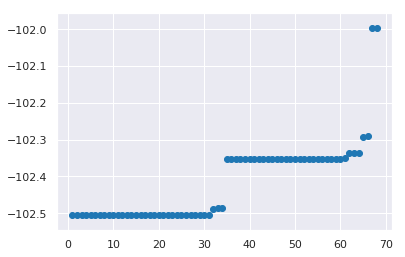

Parameter values
lam2: 0.307 [0.307, 0.307]
lam4: 0.122 [0.122, 0.122]
k24: 1.14e-302 [1.14e-302, 1.14e-302]
k42: 1.46e-56 [1.46e-56, 1.46e-56]

IP_l40


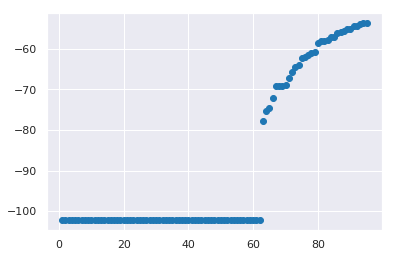

Parameter values
lam2: 0.238 [0.214, 0.266]

IP_l2l4


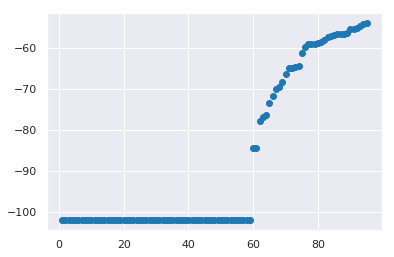

Parameter values
lam2: 0.184 [0.166, 0.205]

IP_l2l4_step


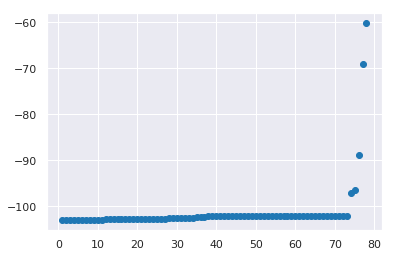

Parameter values
lam1: 1.35 [1.15, 1.59]
lam2: 0.173 [0.158, 0.188]
t_step: 21.6184 +- 0.0639682

IP_l40_step


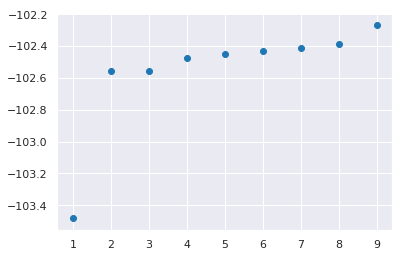

Parameter values
lam1: 0.196 [0.0953, 0.401]
lam2: 0.299 [0.142, 0.627]
t_step: 50.9731 +- 0.0955075



,loglike,k,n,cAIC
IP_l40,102.267358,2.0,40.0,-200.210391
IP_l2l4,102.022136,2.0,40.0,-199.719947
IP_l40_step,103.480974,4.0,40.0,-197.819090
IP_l2l4_step,103.064632,4.0,40.0,-196.986407
IPd,102.505705,5.0,40.0,-193.246705


In [47]:
dataset = 'hepatocytes'
for modelname, result in multistart_result['hepatocytes'].items():
    summarise(result)
results.sort_values('cAIC')

Plot lam2 for `IPl`

In [ ]:
d2, d4, k24, k42 = np.exp(multistart_result['hepatocytes']['IPl'].sort_values('fval').query('valid').iloc[0]['values'])
t = np.linspace(0, 85)
lam2 = -((2*k42 - d2*ploidy(t) - k24*ploidy(t) - 2*k42*ploidy(t) - sp.misc.derivative(ploidy, t, 0.001))/ploidy(t))
plt.plot(t, lam2)

# Weights and Evidence ratio

In [ ]:
final_results = results.copy()

In [ ]:
final_results['delta'] = final_results['cAIC'] - final_results['cAIC'].min() 
final_results['w'] = np.exp(-0.5*final_results['delta']) / np.exp(-0.5*final_results['delta']).sum()
final_results['ER'] = final_results['w'].max() / final_results['w']
final_results.sort_values('cAIC')

In [ ]:
final_results = results.loc[['IP', 'IP_dlk0',
       'IP_dlk0_step', 'IP_l40', 'IP_l40_dd_k420']]

In [ ]:
final_results['delta'] = final_results['cAIC'] - final_results['cAIC'].min() 
final_results['w'] = np.exp(-0.5*final_results['delta']) / np.exp(-0.5*final_results['delta']).sum()
final_results['ER'] = final_results['w'].max() / final_results['w']
final_results.sort_values('cAIC')

# Some plots

## For Paula

### Results of IP_dlk0_step

In [ ]:
res = multistart_result['hepatocytes']['IP_dlk0_step'].query('valid').sort_values('fval').iloc[0]

In [ ]:
p_val = res['values']
p_errors = res['errors']

#### Model prediction

In [ ]:
df_model = datasets['hepatocytes'].copy()
df_model['predicted dC14'] = IP_dlk0_step(datasets['hepatocytes']['Dbirth'],
                                        datasets['hepatocytes']['Dcoll'],
                                        *p_val)
df_model['predicted Sigma'] = Sigma(p_val, IP_dlk0_step, datasets['hepatocytes'])

#### Step function

In [ ]:
np.random.seed(42)
n= 10000
p_sample = np.random.normal(p_val, p_errors, size=(n, 3)).T

In [ ]:
df_step = pd.DataFrame()
df_step['age (years)'] = np.linspace(0, 100, 100)
df_step['turnover_rate (1/year)'] = np.exp(loglam_step(df_step['age (years)'], *p_val))
vector = np.exp(np.vectorize(loglam_step, signature='(n),(),(),()->(n)')(df_step['age (years)'], p_sample[0], p_sample[1], p_sample[2]))
for q in [0.025, 0.975]:
    df_step[f'{q*100}% quantile'] = np.quantile(vector, q, axis=0)

##### Export

In [ ]:
with pd.ExcelWriter('../../results/step_model_results.xlsx') as writer:  # doctest: +SKIP
    df_model.to_excel(writer, sheet_name='model prediction')
    df_step.to_excel(writer, sheet_name='step_function')

In [ ]:
sns.set_context('notebook')

In [ ]:
fig, ax = plt.subplots()
tt = np.linspace(1930, 2000)
ax.plot(tt, C_atm(tt))
ax.plot('Dbirth', 'd14C', data=df_model, ls='None', marker='.')
ax.errorbar(df_model['Dbirth'], df_model['predicted dC14'], df_model['predicted Sigma'], ls='None', marker='.')
plt.xlabel('calendar year')
plt.ylabel('d14C')
plt.ylim(-0.05, 0.15)
plt.legend()
plt.show()

In [ ]:
plt.plot('age (years)', 'turnover_rate (1/year)', data=df_step, label='estimate')
plt.plot('age (years)', '2.5% quantile', data=df_step, label='95% CI', c='C0', ls='--')
plt.plot('age (years)', '97.5% quantile', data=df_step, c='C0', ls='--', label='')
plt.xlabel('age (years)')
plt.ylabel('turnover rate (1/years)')
plt.legend()
plt.show()

## Plot I1T_step

In [ ]:
fig, ax = plt.subplots()
tt = np.linspace(0, 100, 100)
ax.plot(tt, )
ax.plot(tt, res_I1T_step.loc[res_I1T_lin['fval'].idxmin(), 'values']
        np.exp(loglam_step(tt, 
                           *res_I1T_step.loc[res_I1T_lin['fval'].idxmin(), 'values'])
              ),
        label='step'
       )
ax.set_xlabel('age of person')
ax.set_ylabel('turnover rate (per year)')
ax.legend()
fig.savefig('../../results/plots/sigmoidal_solution.pdf', dpi=300, bboc_inches='tight')
plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6, 4))
# time = sp.linspace(1930, 2018, 30)

# ax.plot(time, C_atm(time), label='atmospheric $^{14}$C concentration')

# ax.plot(exp_data['Dbirth'], exp_data['d14C'], ls='None',
#         marker='o', label='C14 in DNA', zorder=10)

# for coll in [2005, 2010, 2015, 2020]:
#     ax.plot(time[time<coll-5], 
#             I1T_step(time[time<coll-5], coll, *M_I1T_step.values.values()), label=f'Model (Collection in {coll})')

# plt.xlim(1930, 2018)
# plt.ylim(-0.12, 0.15)

# ax.set_ylabel('$\Delta^{14}$C')

# ax.legend(loc='lower right')
# ax.set_xlabel('Calendar year')

# plt.savefig('../../results/plots/model_prediction_hepatocytes_v1.pdf', bbox_inches='tight', dpi=300)

# plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6, 4))
# time = sp.linspace(1930, 2018, 30)

# ax.plot(time, C_atm(time), label='atmospheric $^{14}$C concentration')

# ax.plot(exp_data['Dbirth'], exp_data['d14C'], ls='None',
#         marker='o', label='Measured $^{14}$C concentration', zorder=10)

# ax.errorbar(exp_data['Dbirth'],
#            I1T_step(exp_data['Dbirth'], exp_data['Dcoll'], *M_I1T_step.values.values()),
#             Sigma(M_I1T_step.values.values(), I1T_step, exp_data),
#             ls='None', marker='o', label='Best fit'
#            )

# plt.xlim(1930, 2018)
# plt.ylim(-0.05, 0.15)

# ax.set_ylabel('$\Delta^{14}$C')

# ax.legend(loc='lower right')
# ax.set_xlabel('Calendar year')

# plt.savefig('../../results/plots/model_prediction_hepatocytes_v2.pdf', bbox_inches='tight', dpi=300)

# plt.show()

## Plot

In [ ]:
fig, ax = plt.subplots()
tt = np.linspace(0, 100, 100)
ax.plot(tt, 
        lam_lin(tt, *res_I1T_lin.loc[res_I1T_lin['fval'].idxmin(), 'values'])
       )
# ax.plot(tt, res_I1T_step.loc[res_I1T_lin['fval'].idxmin(), 'values'],
#         np.exp(loglam_step(tt, 
#                            *res_I1T_step.loc[res_I1T_lin['fval'].idxmin(), 'values'])
#               )
#        )
ax.set_xlabel('age of person')
ax.set_ylabel('turnover rate (per year)')
# fig.savefig('../../results/plots/sigmoidal_solution.pdf', dpi=300, bboc_inches='tight')
plt.show()

## Plot I1, I1T, I1_memory

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
tt = np.linspace(1930, 2020)
ax.plot(tt, np.vectorize(c14_models.C_atm)(tt))
ax.plot(exp_data['Dbirth'], exp_data['d14C'], ls = 'None', marker = 'o')

# ax.errorbar(exp_data['Dbirth']-0.4, 
#             I1(exp_data['Dbirth'].values,
#                exp_data['Dcoll'].values,
#                *res_I1.x
#                ),
#            Sigma(res_I1.x, I1, exp_data),
#            ls='None',
#             marker='s',
#            label = 'I1')

ax.errorbar(exp_data['Dbirth'], 
            I1T_step(exp_data['Dbirth'].values,
                          exp_data['Dcoll'].values,
                          *res_I1T_step.x
                         ),
           0*Sigma(res_I1T_step.x, I1T_step, exp_data),
           ls='None',
            marker='s',
           label = 'I1T_step')

# ax.errorbar(exp_data['Dbirth']+0.4, 
#              I1_memory(exp_data['Dbirth'], 
#                       exp_data['Dcoll'],
#                       *res_I1_memory.x),
#              Sigma(res_I1_memory.x, I1_memory, exp_data),
#              ls = 'None',
#             marker='o',
#            label='I1_memory')


ax.set_ylim((0, 0.12))
ax.legend()
plt.show()

# Other models

## Ploidy model, lam4=0

In [ ]:
@np.vectorize
def IP_l40(Dbirth, Dcoll, loglam2, logk24, logk42):
    lam2 = np.exp(loglam2)
    k24 = np.exp(logk24)
    k42 = np.exp(logk42)
    
    def k24_(t):
        return 0.5 * k24 * ploidy(t-Dbirth) / (1-ploidy(t-Dbirth))
    def k42_(t):
        return 2 * k42 * (1-ploidy(t-Dbirth)) / ploidy(t-Dbirth)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = -(lam2 + k42_(t)) * c2 + k42_(t) * c4 + lam2 * C_atm(t)
        dtc4 = -2*k24_(t) * c4 + k24_(t) * c2 + k24_(t) * C_atm(t)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## Ploidy model - same death rate

In [ ]:
@np.vectorize
def IP_d(Dbirth, Dcoll, loglam2, loglam4, logk24):
    lam2 = np.exp(loglam2)
    lam4 = np.exp(loglam4)
    k24 = np.exp(logk24)
    
    def k24_(t):
        return 0.5 * k24 * ploidy(t-Dbirth) / (1-ploidy(t-Dbirth))
    def f(t):
        return 2/(2-ploidy(t-Dbirth))*(sp.misc.derivative(ploidy, t-Dbirth, 0.001)/ploidy(t-Dbirth) + k24 + (lam2-lam4)*(ploidy(t-Dbirth)-1))
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = -(lam2 + f(t)) * c2 + f(t) * c4 + lam2 * C_atm(t)
        dtc4 = -(lam4 + 2*k24_(t)) * c4 + k24_(t) * c2 + (lam4+k24_(t)) * C_atm(t)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## Ploidy model - same death, division rate

In [ ]:
@np.vectorize
def IP_dl(Dbirth, Dcoll, loglam2, logk24):
    lam2 = np.exp(loglam2)
    lam4 = np.exp(loglam2)
    k24 = np.exp(logk24)
    
    def k24_(t):
        return 0.5 * k24 * ploidy(t-Dbirth) / (1-ploidy(t-Dbirth))
    def f(t):
        return 2/(2-ploidy(t-Dbirth))*(sp.misc.derivative(ploidy, t-Dbirth, 0.001)/ploidy(t-Dbirth) + k24)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = -(lam2 + f(t)) * c2 + f(t) * c4 + lam2 * C_atm(t)
        dtc4 = -(lam4 + 2*k24_(t)) * c4 + k24_(t) * c2 + (lam4+k24_(t)) * C_atm(t)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## Ploidy model - same death, $\lambda_4=0$

In [ ]:
@np.vectorize
def IP_dl40(Dbirth, Dcoll, loglam2, logk24):
    lam2 = np.exp(loglam2)
    lam4 = 0
    k24 = np.exp(logk24)
    
    def k24_(t):
        return 0.5 * k24 * ploidy(t-Dbirth) / (1-ploidy(t-Dbirth))
    def f(t):
        return 2/(2-ploidy(t-Dbirth))*(sp.misc.derivative(ploidy, t-Dbirth, 0.001)/ploidy(t-Dbirth) + k24)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = -(lam2 + f(t)) * c2 + f(t) * c4 + lam2 * C_atm(t)
        dtc4 = -(lam4 + 2*k24_(t)) * c4 + k24_(t) * c2 + (lam4+k24_(t)) * C_atm(t)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## I1 Memory

In [ ]:
@np.vectorize
def I1_memory(Dbirth, Dcoll, loglam, f, t0):
    lam = np.exp(loglam)
    C1 = c14_models.I1c(Dbirth, Dcoll, lam)
    
    if t0>Dcoll-Dbirth:
        return C1
    else:
        C0 = c14_models.I1c(Dbirth, Dbirth + t0, lam)
        return f*C1 + (1-f)*C0

## I1 Memory Interval

In [ ]:
@np.vectorize
def I1_memory_interval(Dbirth, Dcoll, loglam, f, t0, t1):
    if f >= 1:
        f = 1
    if t0 < 0.1:
        t0 = 0.1
    if t1 < 0.1:
        t1 = 0.1
    lam = np.exp(loglam)
    C1 = c14_models.I1c(Dbirth, Dcoll, lam)
    C0 = C1
    
    if Dbirth + t0 >= Dcoll:
        C0 = C1
    elif Dbirth + t0 + t1 >= Dcoll:
        C0 = np.mean(np.vectorize(c14_models.I1c)(Dbirth, np.arange(Dbirth + t0, Dcoll, 1), lam))
    else:
        C0 = np.mean(np.vectorize(c14_models.I1c)(Dbirth, np.arange(Dbirth + t0, Dbirth + t0 + t1, 1), lam))
    return f*C1 + (1-f)*C0

## I1T_sigmoid

In [ ]:
I1T = c14_models.I1T

In [ ]:
@np.vectorize
def I1T_sigmoid(Dbirth, Dcoll, loglam1, loglam2, t_step, n):
    lam1 = np.exp(loglam1)
    lam2 = np.exp(loglam2)
    
    if n > 20:
        n = 20
    if n < 0.5:
        n = 0.5
    def lam_sigmoid(t, lam1, lam2, t_step, n):
        return lam1 + (lam2 - lam1) * (t-Dbirth)**n / (t_step**n + (t-Dbirth)**n)
    
    return I1T(Dbirth, Dcoll, lam_sigmoid, t_eval=np.linspace(Dbirth, Dcoll), lam_arg=(lam1, lam2, t_step, n))[1][-1]

## I1T_linear

In [ ]:
I1T = c14_models.I1T

In [ ]:
@np.vectorize
def I1T_linear(Dbirth, Dcoll, loglam0, r):
    lam0 = np.exp(loglam0)
    r = np.tanh(tanr)
        
    def lam_linear(t, lam0, r):
        if lam0 + r*(t-Dbirth) > 0:
            return lam0 + r*t
        else:
            return 0
    
    return I1T(Dbirth, Dcoll, lam_linear, t_eval=np.linspace(Dbirth, Dcoll), lam_arg=(lam0, r))[1][-1]

## I1T_transient

In [ ]:
@np.vectorize
def I1T_transient(Dbirth, Dcoll, loglam1, loglam2, t_on, t_off):
    lam1 = np.exp(loglam1)
    lam2 = np.exp(loglam2)
    
    def lam_transient(t, lam1, lam2, t_on, t_off):
        return np.where(np.logical_or(t < Dbirth + t_on,
                                      t > Dbirth + t_on + t_off),
                        lam1, 
                        lam2)
    
    return I1T(Dbirth, Dcoll, lam_transient, 
               t_eval=np.linspace(Dbirth, Dcoll), 
               lam_arg=(lam1, lam2, t_on, t_off)
              )[1][-1]

## I2

In [ ]:
@np.vectorize
def I2(Dbirth, Dcoll, loglam, f):
    lam = np.exp(loglam)
    return c14_models.I2(Dbirth, Dcoll, lam, f, 
                         t_eval=np.linspace(Dbirth, Dcoll))[1][-1]

## IK

In [ ]:
@np.vectorize
def IK(Dbirth, Dcoll, loglam, f):
    lam = np.exp(loglam)
    return c14_models.IK(Dbirth, Dcoll, lam, f, t_eval=np.linspace(Dbirth, Dcoll))[1][-1]

## IL

In [ ]:
@np.vectorize
def IL(Dbirth, Dcoll, loglam, f):
    lam = np.exp(loglam)
    return c14_models.IL(Dbirth, Dcoll, lam, f, t_eval=np.linspace(Dbirth, Dcoll))[1][-1]

## Scenario IX2p

In [ ]:
@np.vectorize
def IX2p(Dbirth, Dcoll, dloglam1, dloglam2, f1):
    dlam1 = np.exp(dloglam1)
    dlam2 = np.exp(dloglam2)
    
    f2 = 1-f1
    
    return c14_models.IX(Dbirth, Dcoll, [dlam1, dlam2], [f1, f2],
                        t_eval=np.linspace(Dbirth, Dcoll))[1][-1]

In [ ]:
results.sort_values('cAIC')